In [1]:
import numpy as np
import time
from glob import glob
from natsort import natsorted
from skimage.measure import label
from skimage.segmentation import relabel_sequential
import matplotlib.pyplot as plt

from metrics import evaluate 
from utils import *
import cv2, os

In [2]:
meds = ["maskrcnn"]
len_test = 25

In [3]:

maskrcnn_path = natsorted (glob ('/home/tuan/Mask_RCNN/results/cremi_256//submit_20200830T075820/*.tif')) [:len_test]

gt_path = natsorted (glob ('/home/tuan/Data/Cremi/Corrected/256/test/B/*.tif'))
em_path = natsorted (glob ('/home/tuan/Data/Cremi/Corrected/256/test/A/*.tif'))

In [4]:

maskrcnn = [io.imread (pth) for pth in maskrcnn_path]
em =  [io.imread (pth) for pth in em_path]
gt = [io.imread (pth) for pth in gt_path]

In [5]:
gt_median_sizes = [np.median (np.unique (img, return_counts=True)[1]) for img in gt]
print (gt_median_sizes)

[2347.0, 2666.0, 594.0, 1345.0, 1251.5, 118.5, 1292.0, 1591.0, 995.0, 1470.0, 561.0, 2410.5, 1908.0, 812.0, 1238.0, 1282.0, 1275.0, 641.0, 1064.0, 1374.0, 160.0, 2365.0, 495.0, 503.0, 1372.0]


In [6]:
paths = [maskrcnn_path]
res = [maskrcnn]

In [8]:
metrics = ["bestDice", "rand_i", "voi_split", "voi_merge", "adapted_rand", "AJI"]
tmp = []
for med, met, lbl_lists in zip (meds, metrics, res):
    if med == 'graphcl':
        continue
    scores = np.zeros (len (metrics))
    for i in range (len_test):
        gt_lbl = gt [i]
        pred_lbl = relabel_sequential (lbl_lists [i]) [0]
        size = gt_lbl.shape
        pred_lbl = cv2.resize (pred_lbl.astype (np.int32), size, interpolation=cv2.INTER_NEAREST)
        scores += np.array (evaluate (pred_lbl, gt_lbl))
        lbl_lists [i] = pred_lbl
    tmp += [lbl_lists]
    scores /= len_test
    print (med)
    for met, score in zip (metrics, scores):
        print (met, ":\t", score)
    print ('-' * 60)
maskrcnn = tmp

maskrcnn
bestDice :	 0.8108693005464593
rand_i :	 0.66908350641554
voi_split :	 0.6605492290236255
voi_merge :	 0.49352218565716144
adapted_rand :	 0.2066882639087041
AJI :	 0.6760962696801194
------------------------------------------------------------


In [9]:
maskrcnn = tmp [0]
    

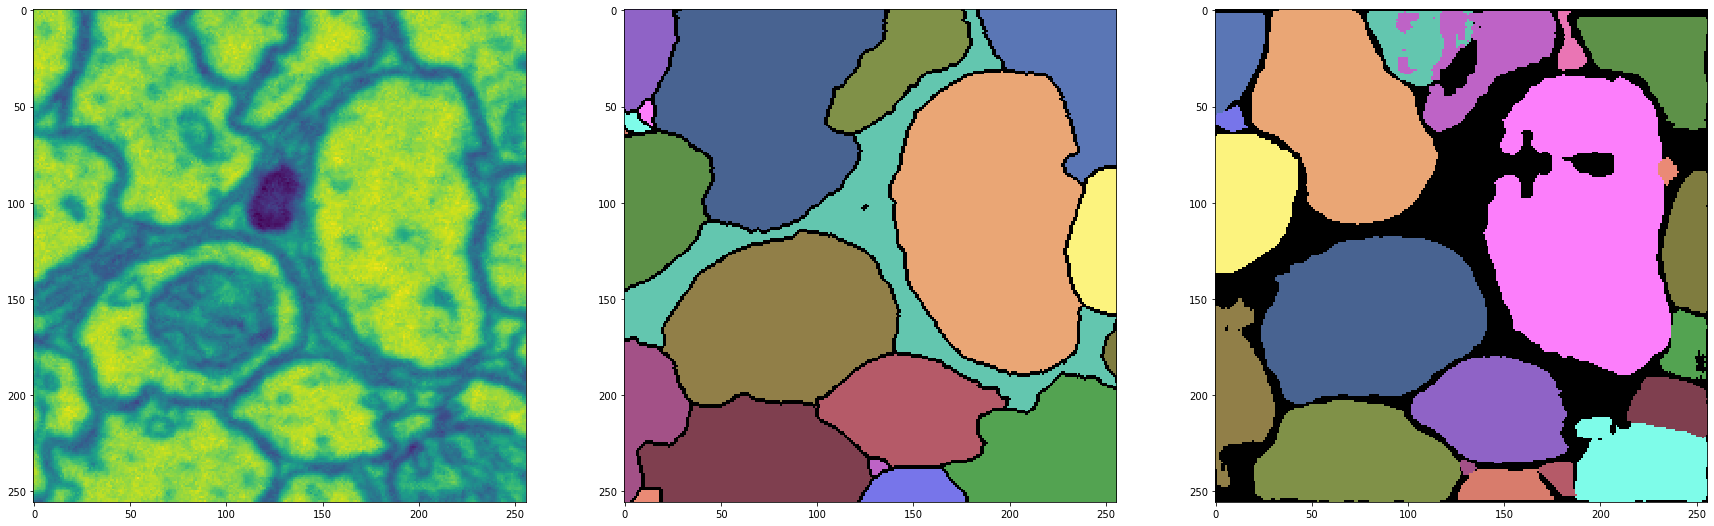

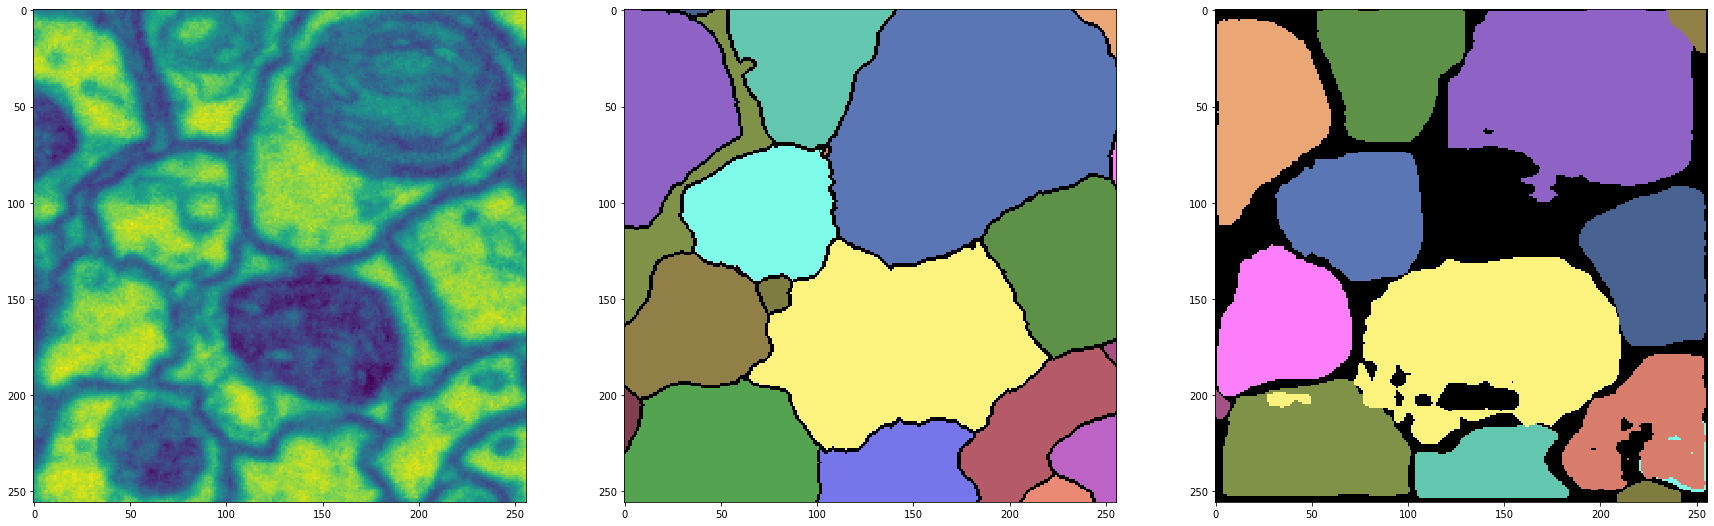

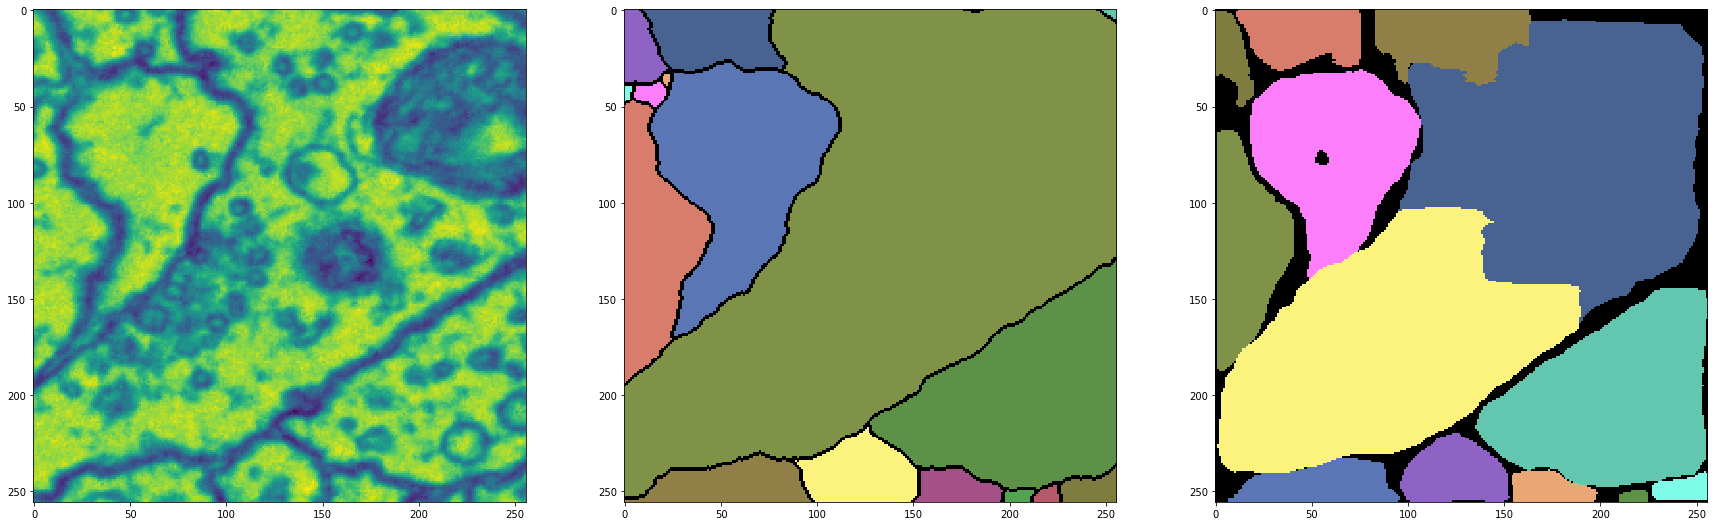

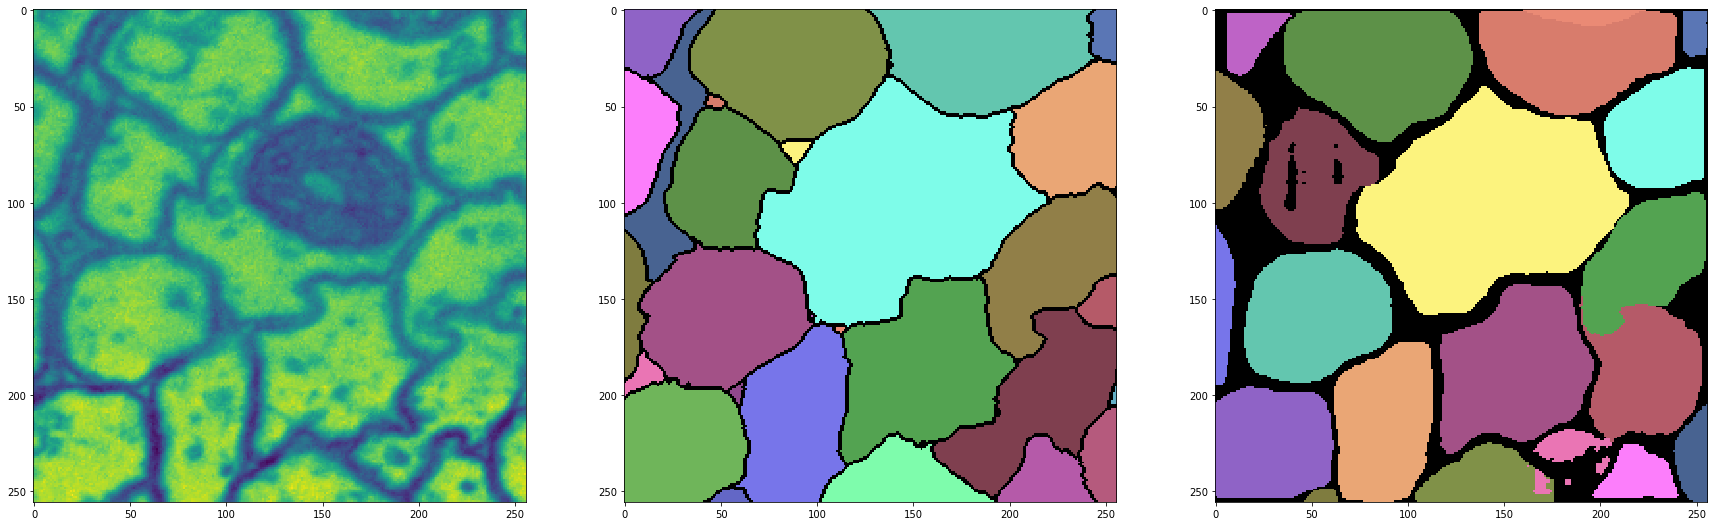

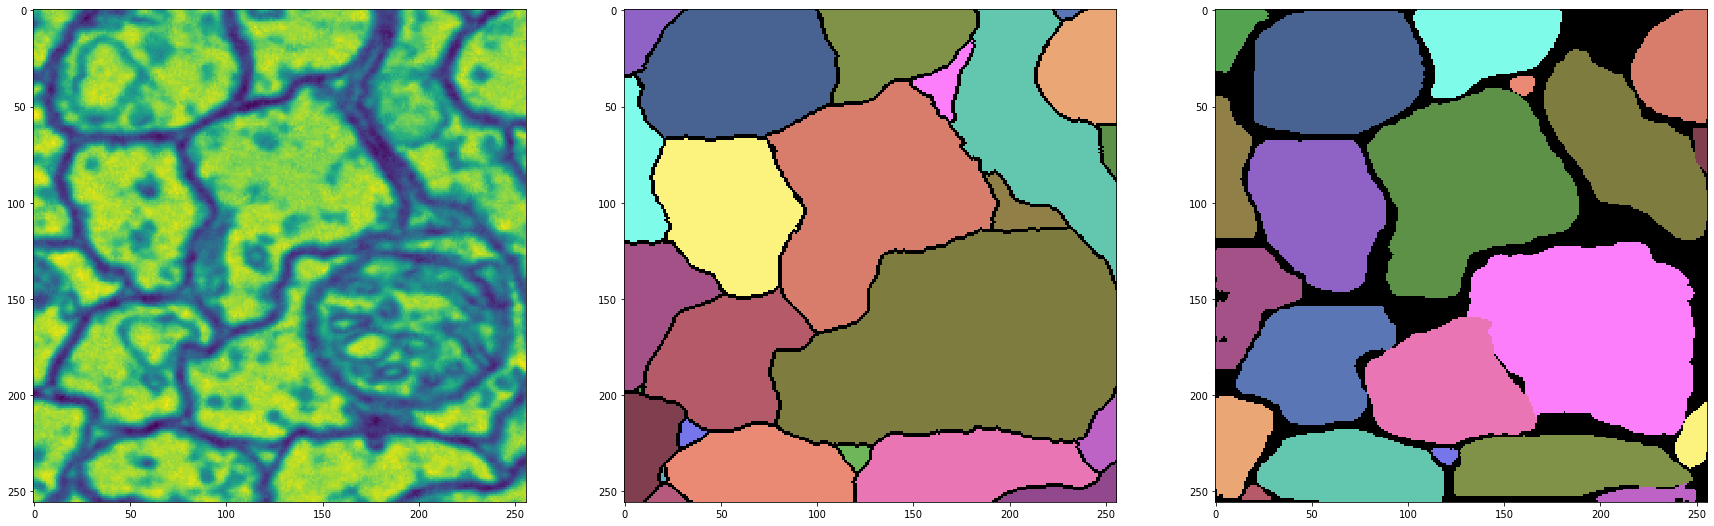

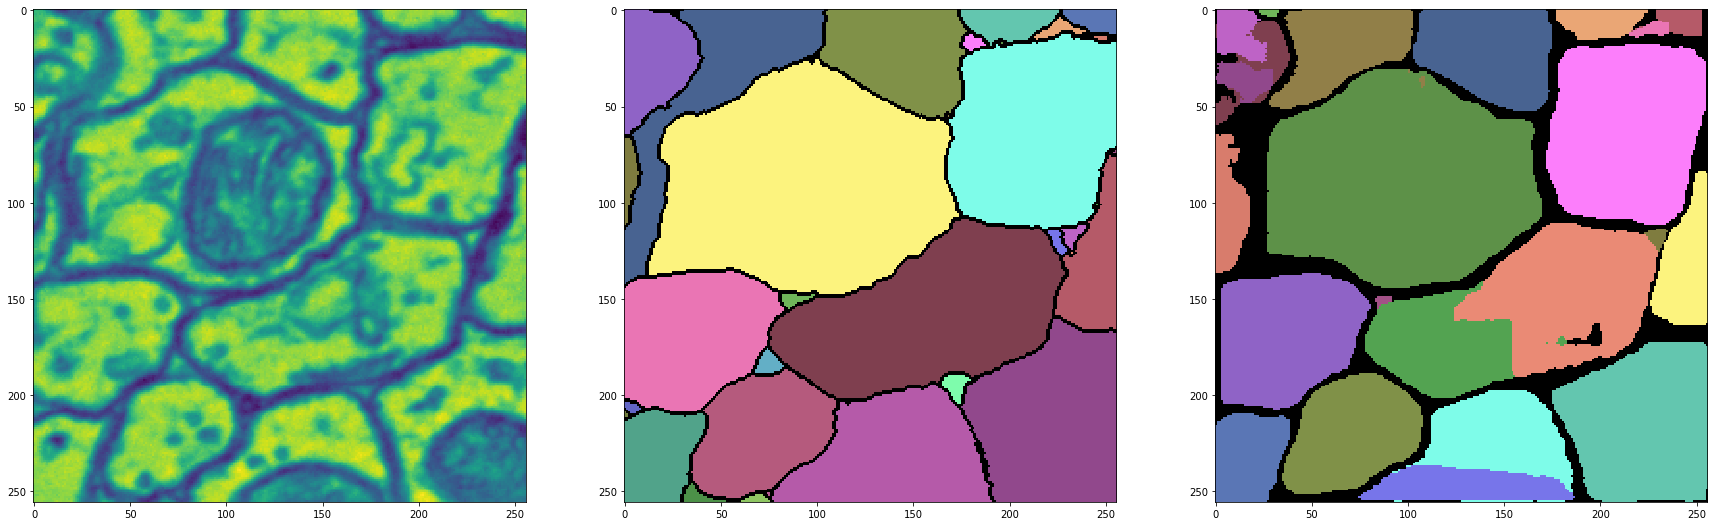

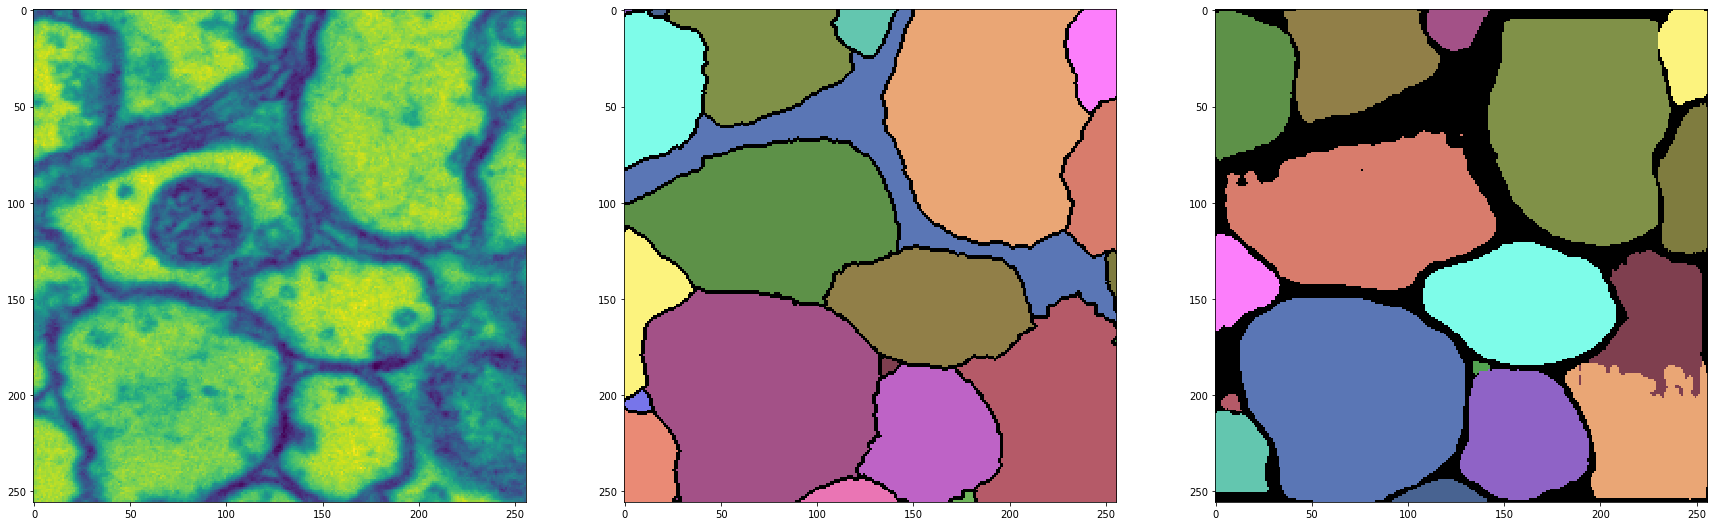

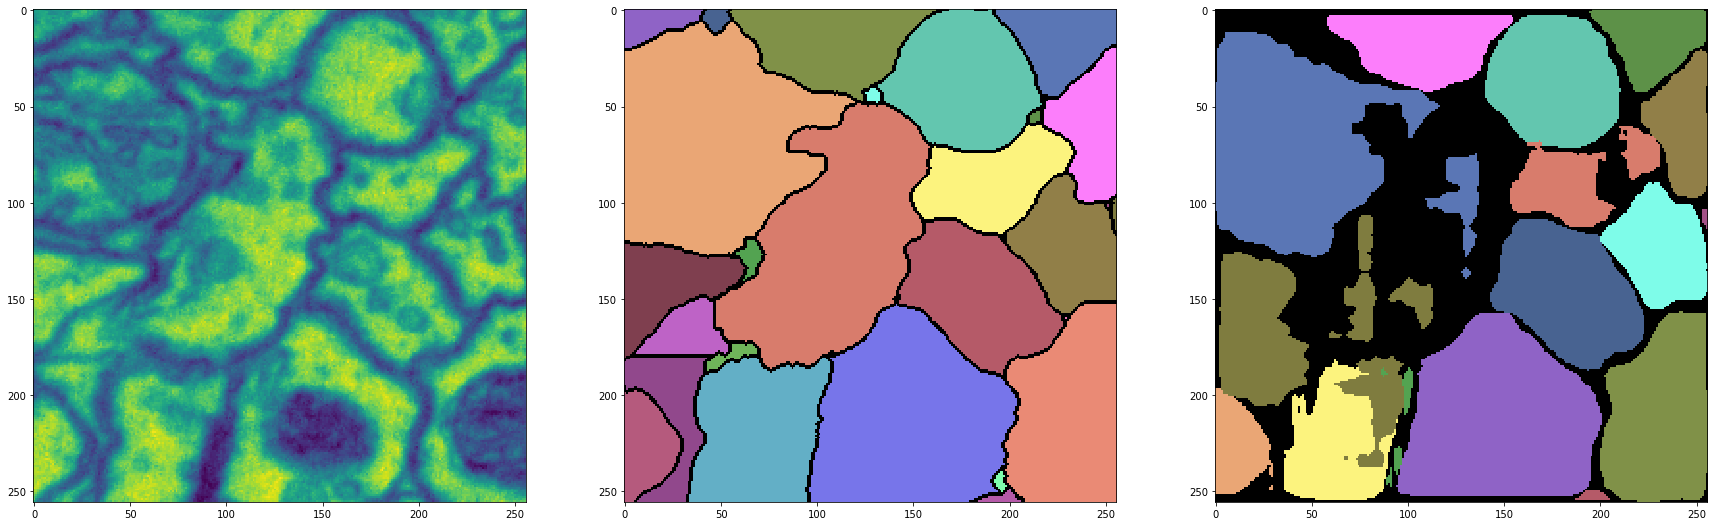

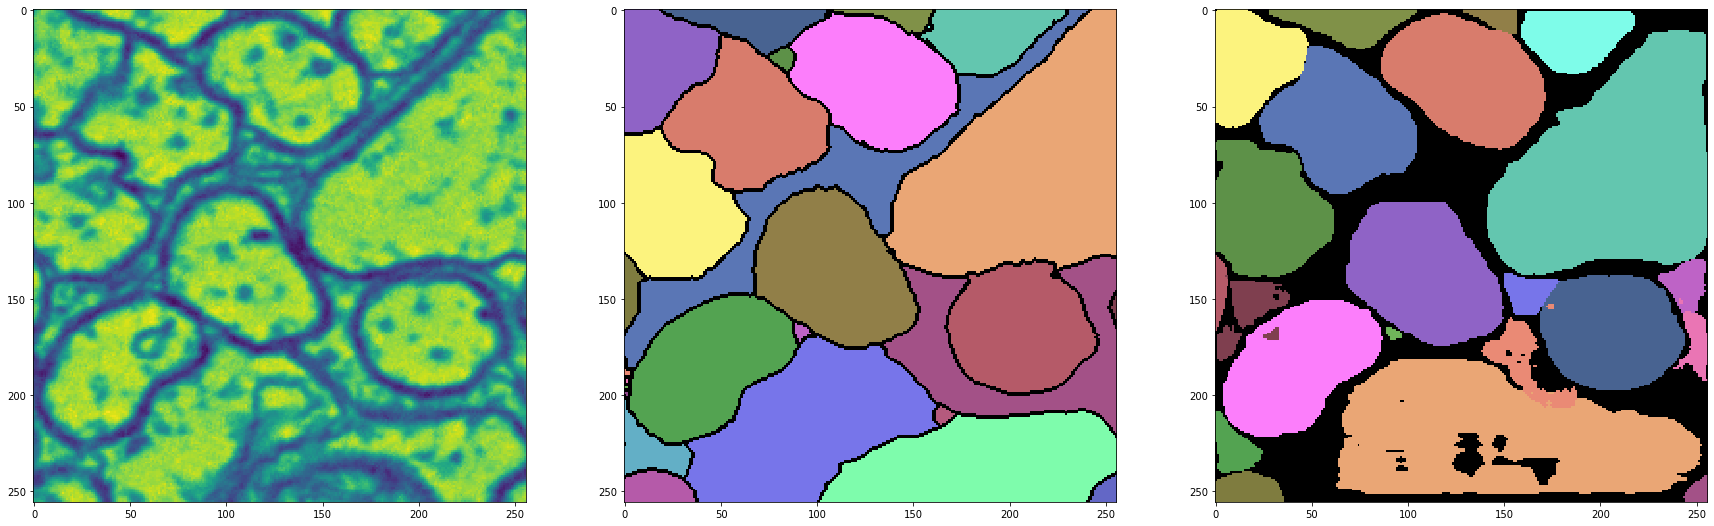

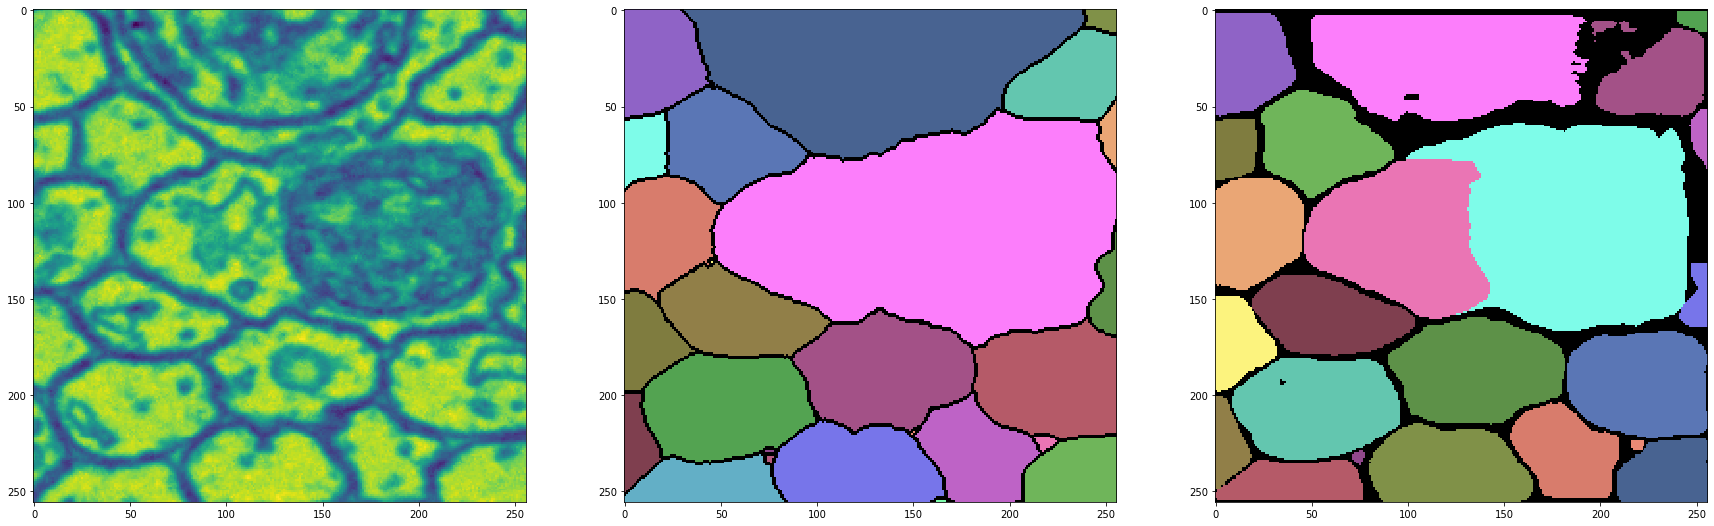

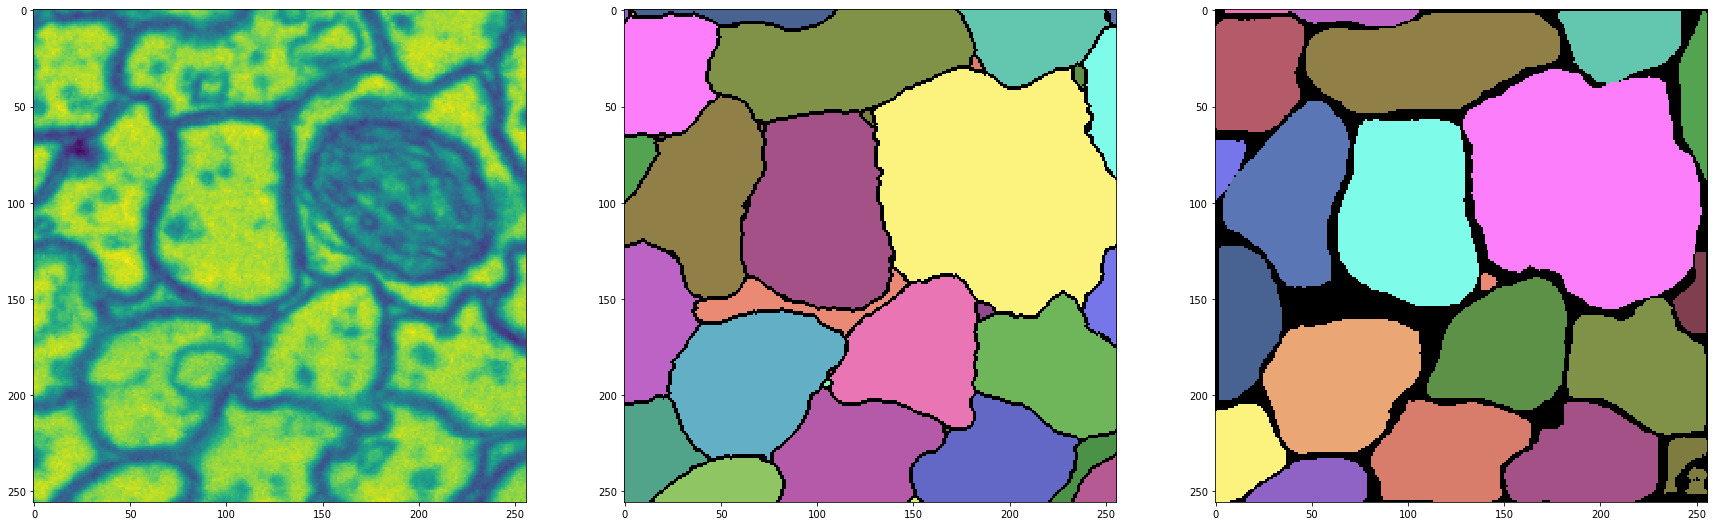

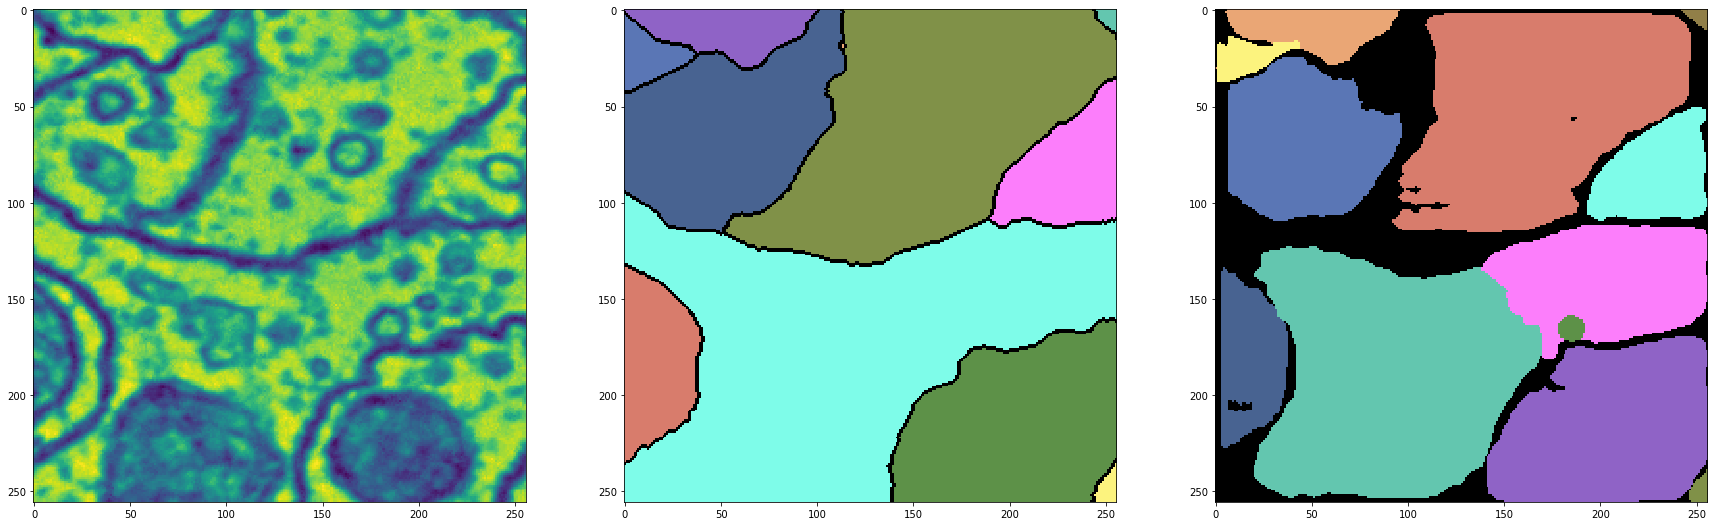

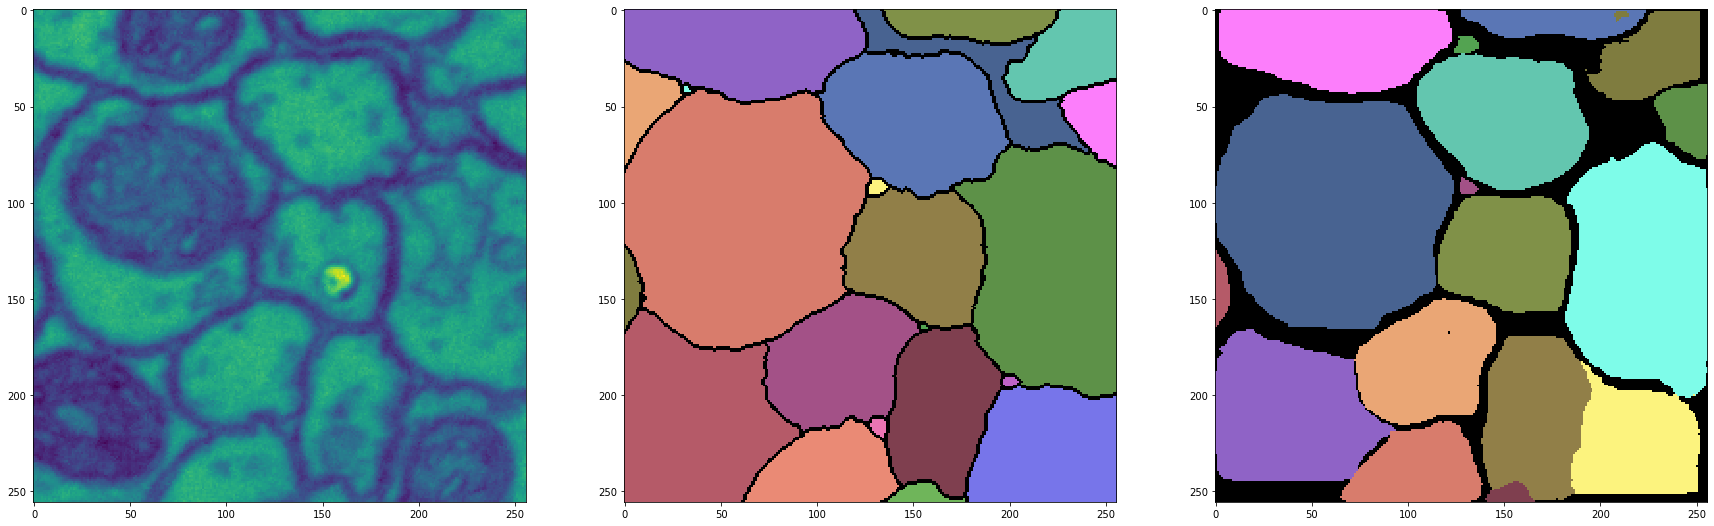

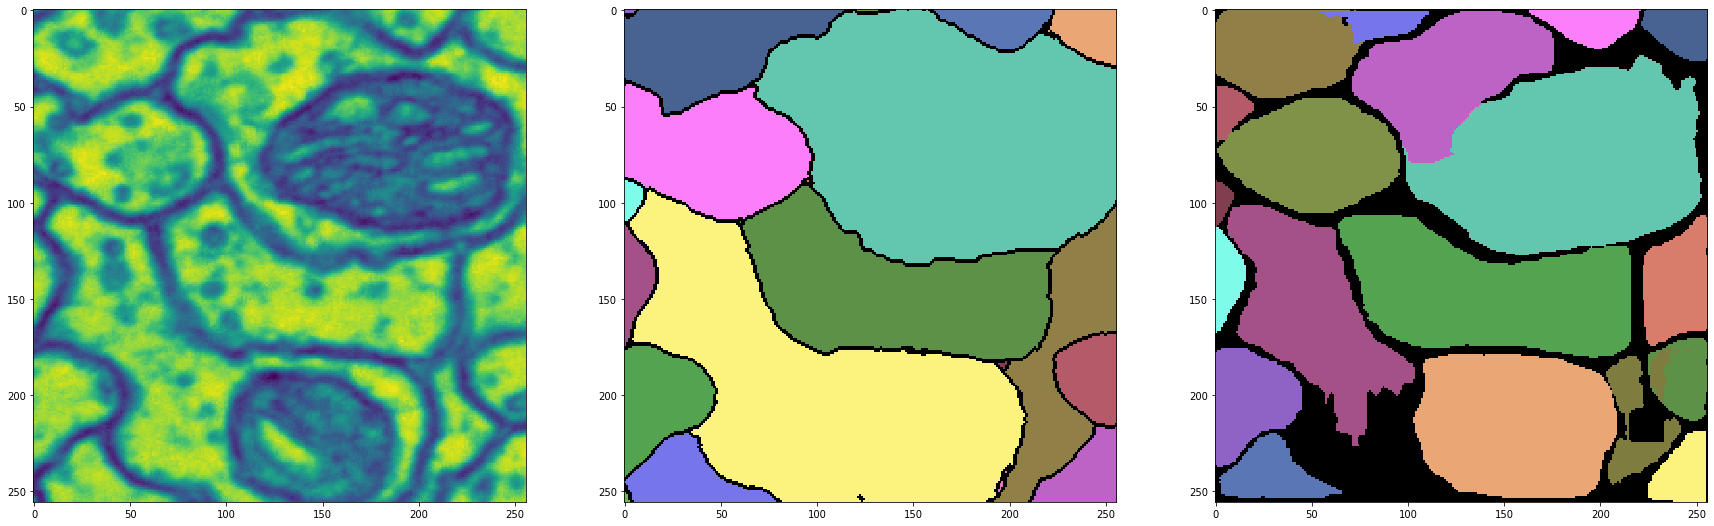

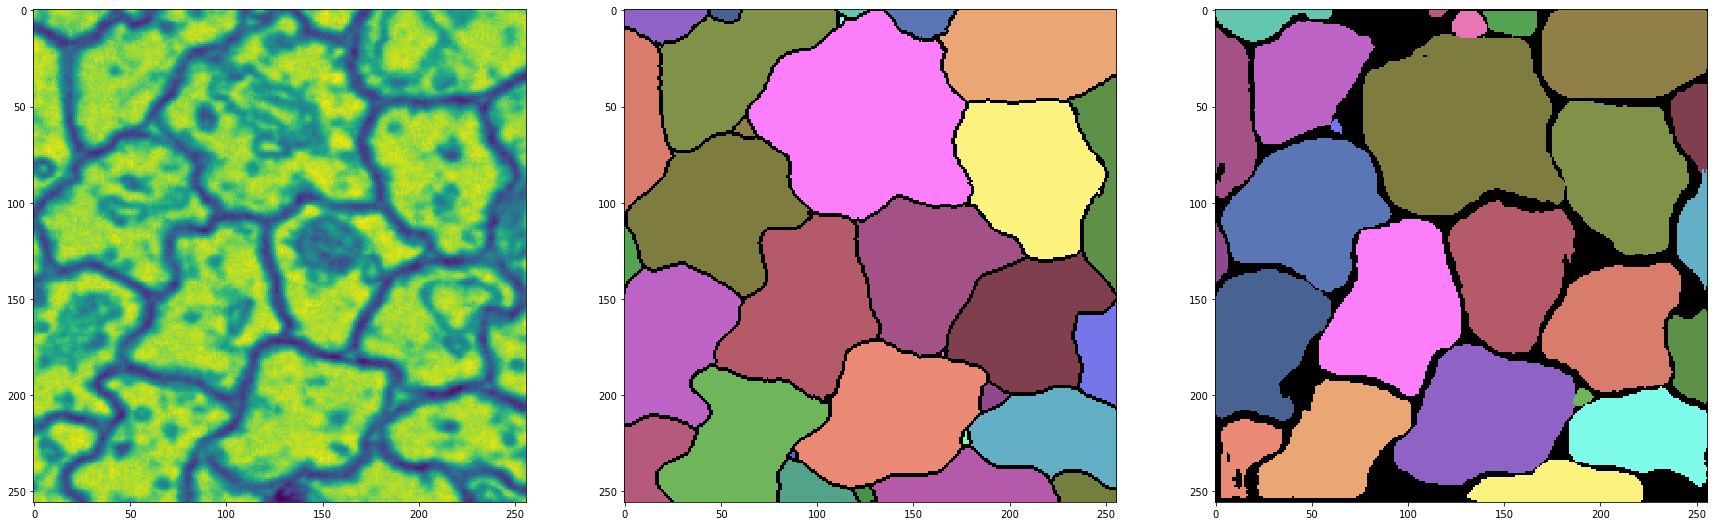

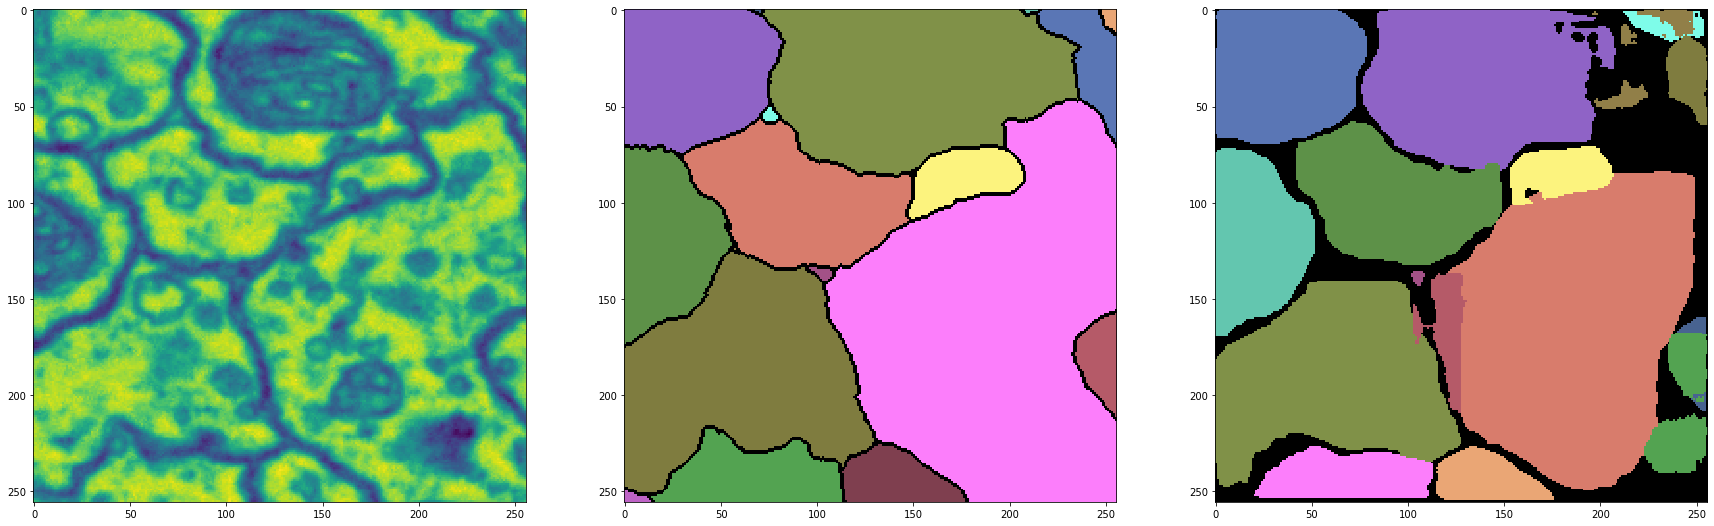

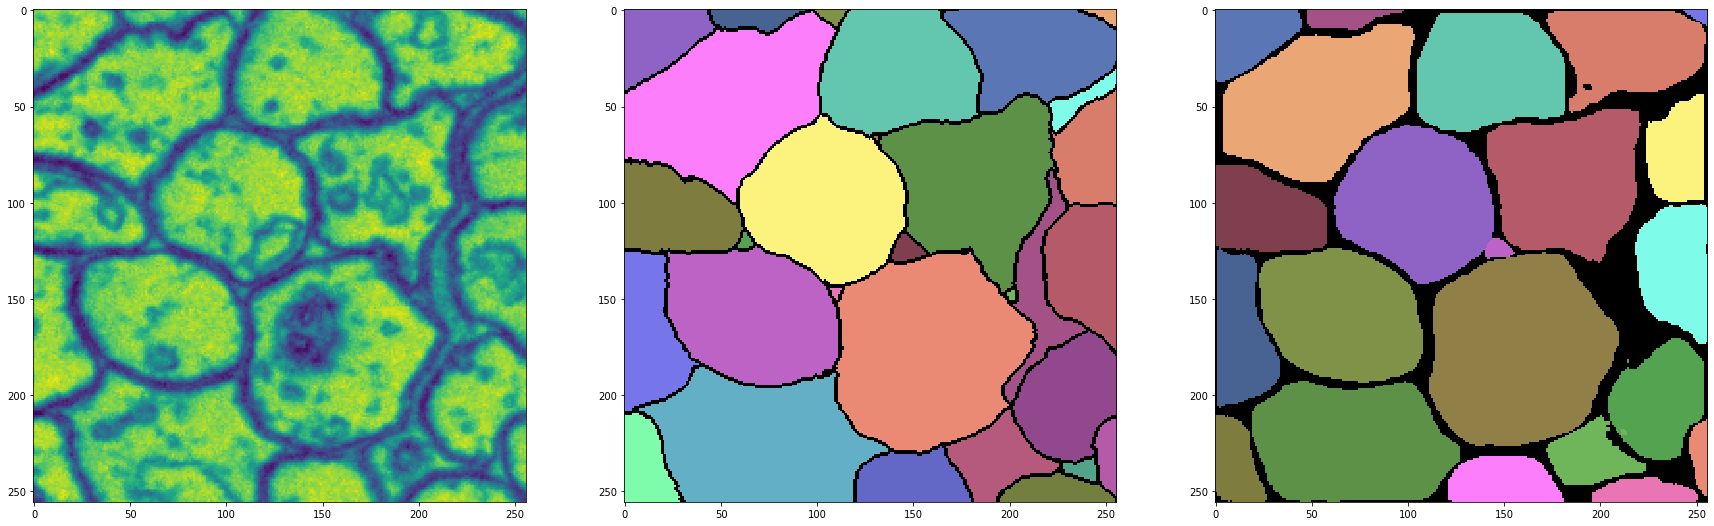

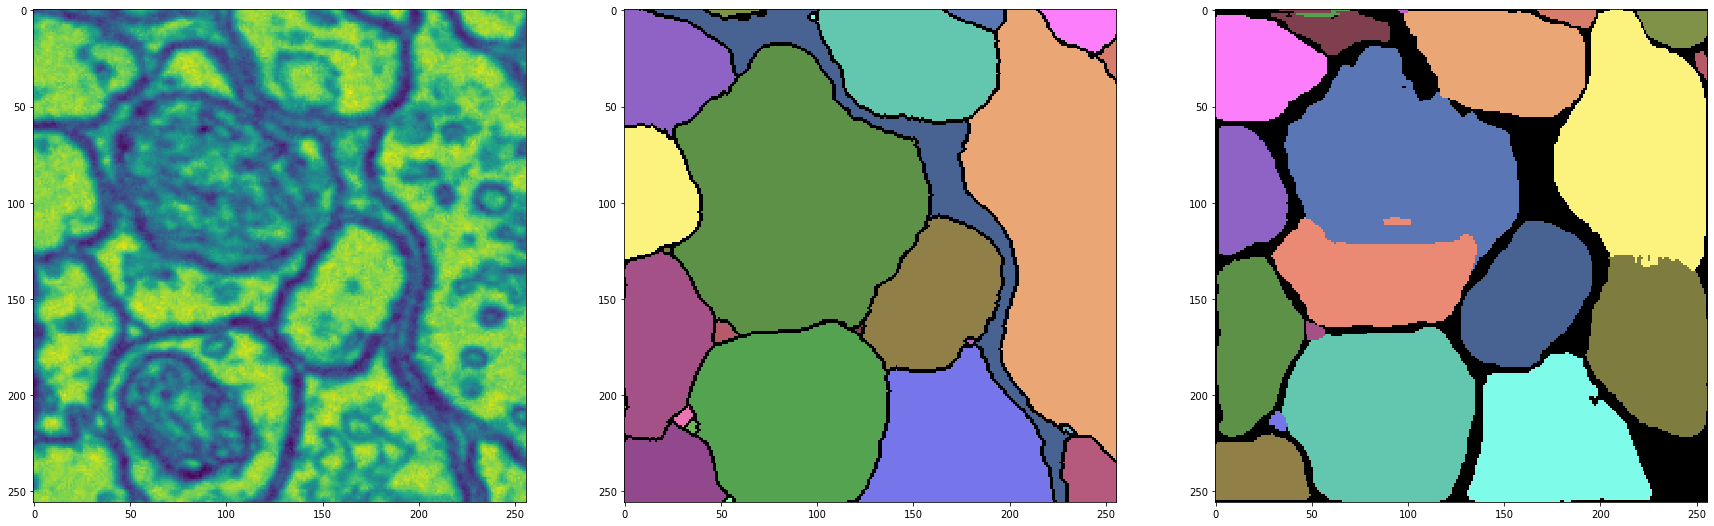

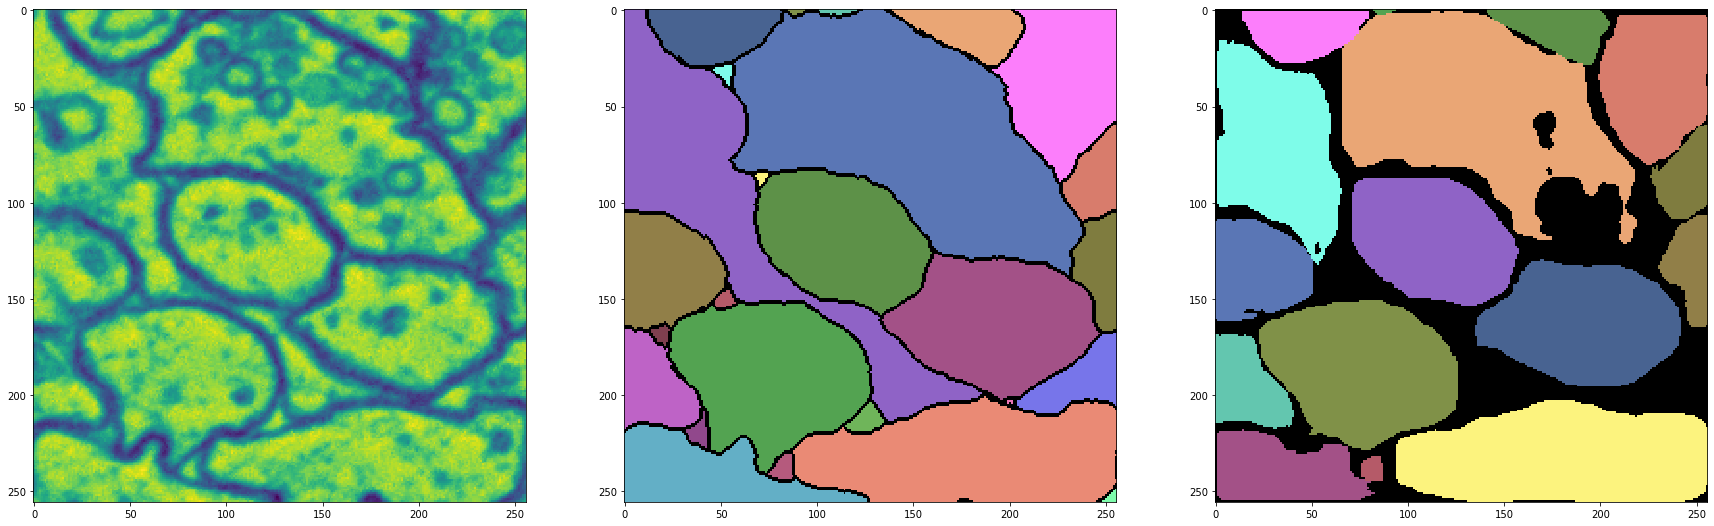

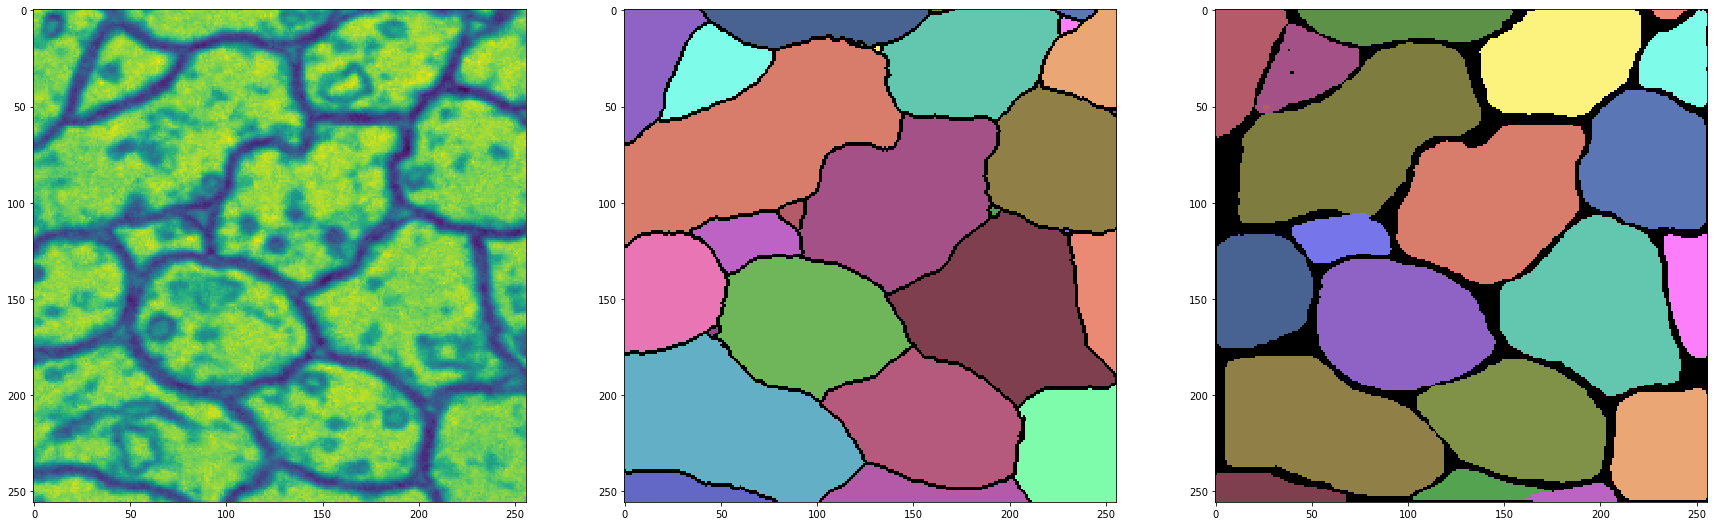

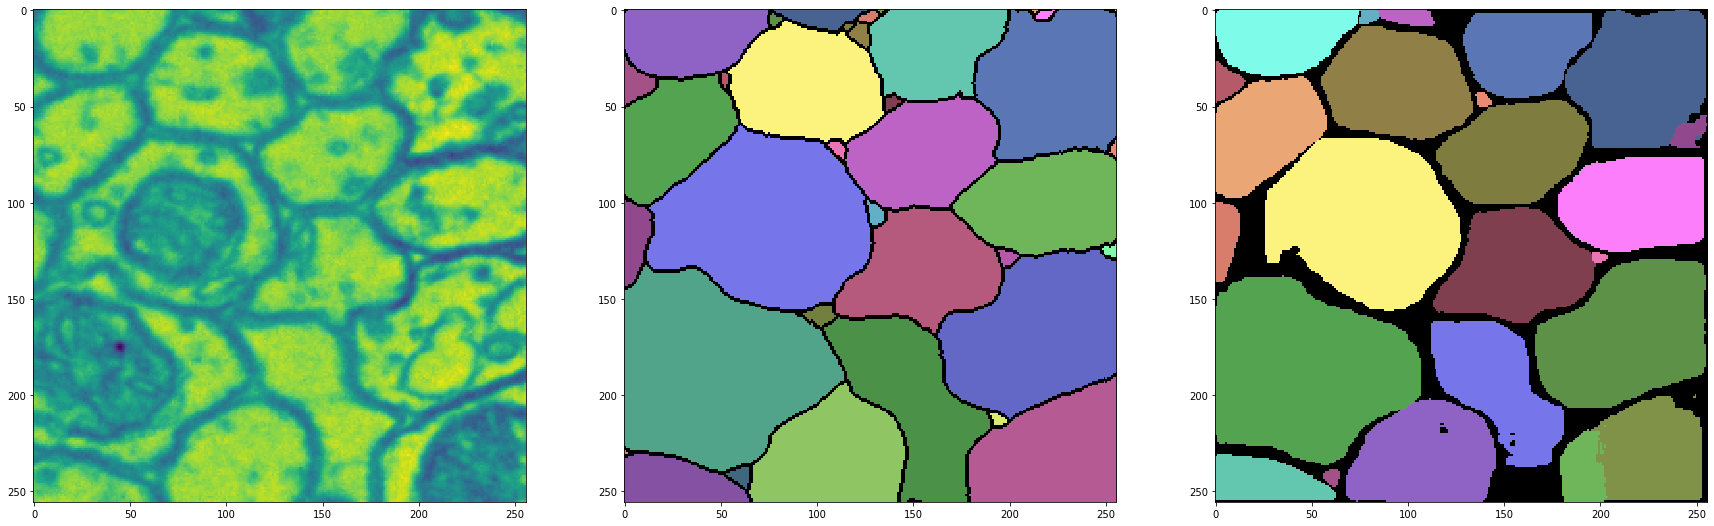

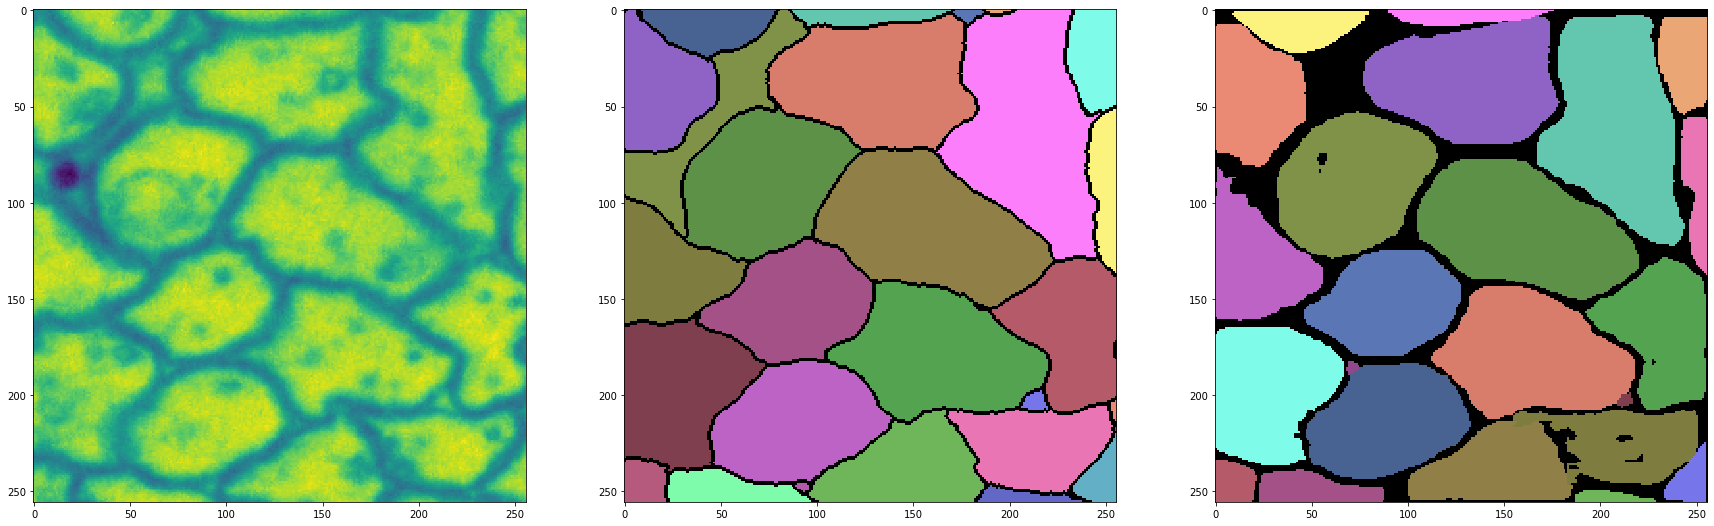

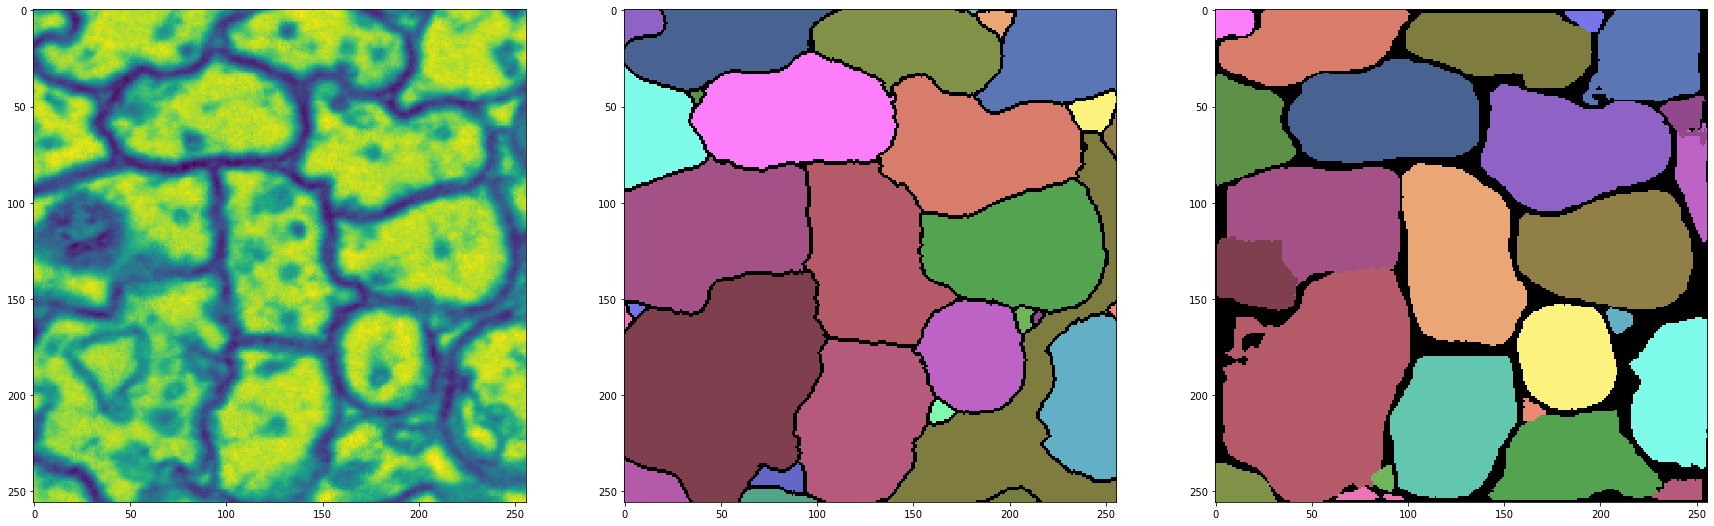

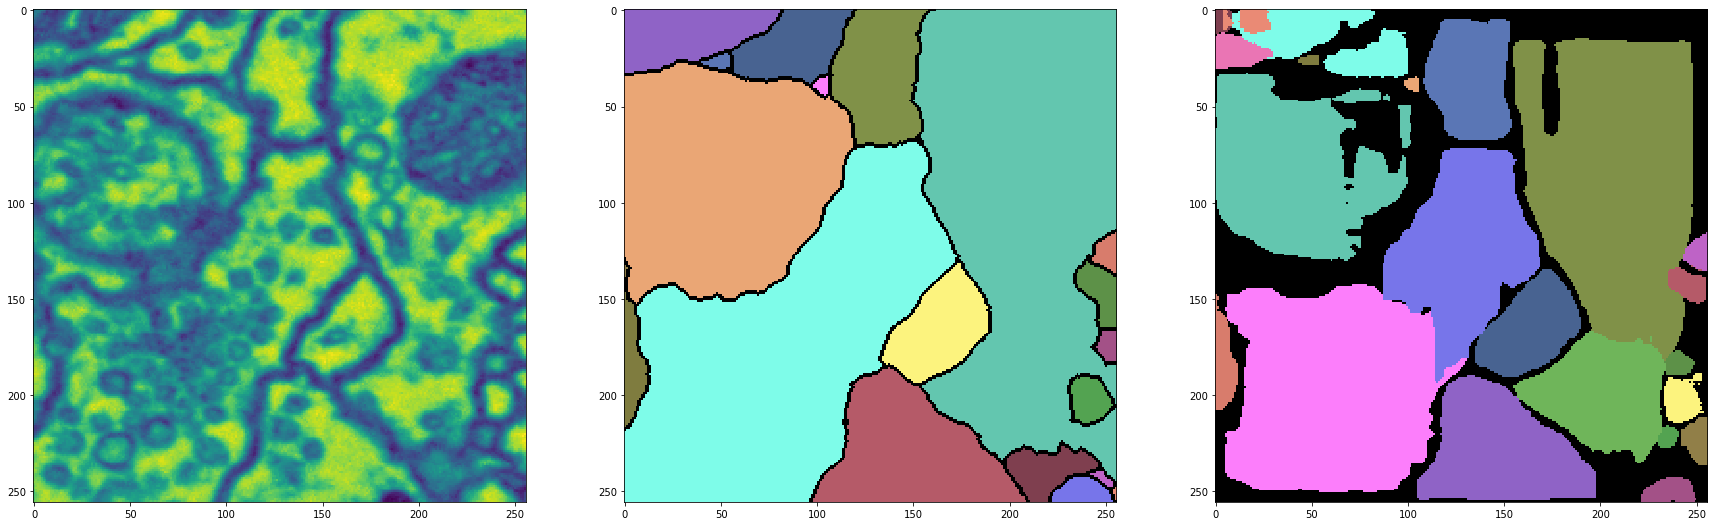

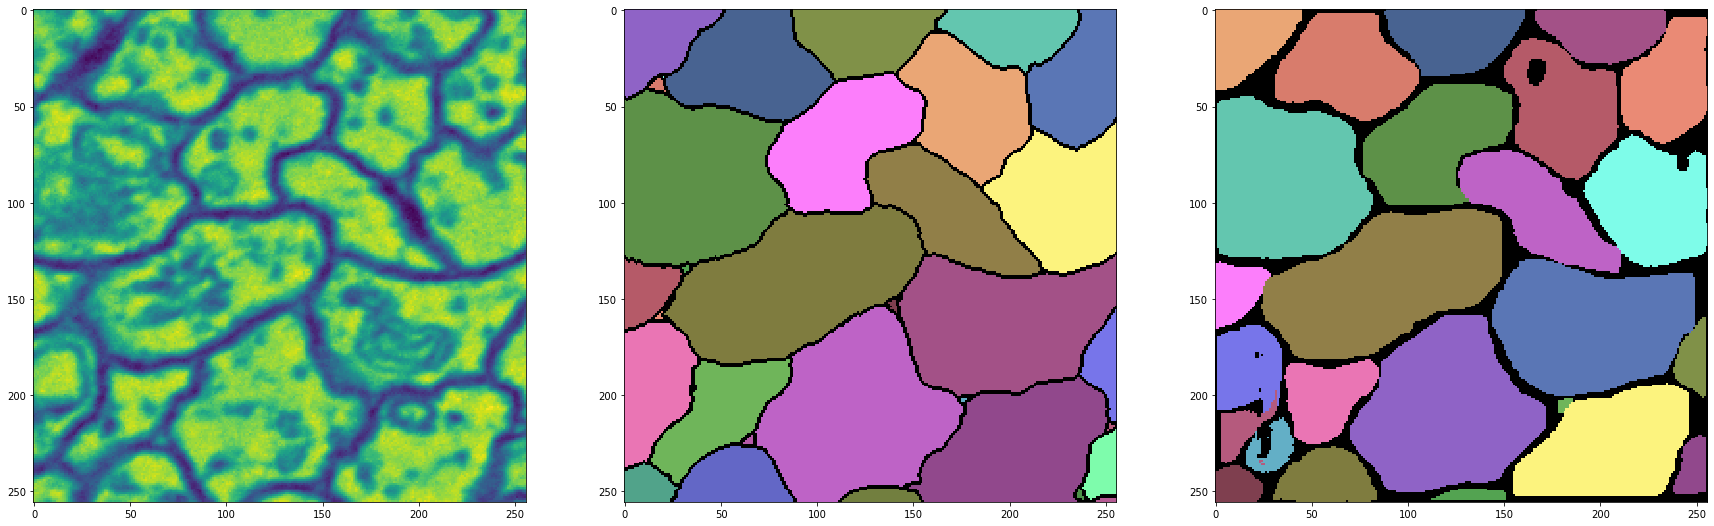

In [10]:
lbl2rgb = color_generator (200)
for idx in range (0, 25):
    fig, ax = plt.subplots (1,3, figsize=(30,10))
    ax [0].imshow (em [idx])
    ax [1].imshow (lbl2rgb (gt [idx]))
    ax [2].imshow (lbl2rgb (maskrcnn[idx]))
    plt.show ()

In [12]:
result_dir = "256_cremi_results"
lbl2rgb = color_generator (100)
res = [ maskrcnn, gt]
meds = ["maskrcnn", "gt"]
for med, lbl_lists in zip (meds, res):
    med_dir = result_dir + "/" + med + '/'
    os.makedirs (med_dir, exist_ok=True)
    if med in ['rec', 'acis', 'em']:
        continue
    
    for i in range (len_test):
        io.imsave (med_dir + '/' + str (i) + '.png', lbl2rgb (lbl_lists [i]))

os.makedirs (result_dir + "/" + 'em' + '/', exist_ok=True)
for i in range (len_test):
    io.imsave (result_dir + '/em/' + str (i) + '.png', em[i])


Lossy conversion from int64 to uint8. Range [0, 252]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 252]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 252]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 252]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 252]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 252]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 252]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 252]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 